In [46]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [87]:
#create the data
n=50 #number of samples
#center data clouds for the two classes
origin1=torch.tensor([2,2])
origin2=torch.tensor([7,7])
noise=1.9 #st dev of the noise spread
#class 1
x_class1=origin1 + noise *torch.randn(n,2)
y_class1=torch.zeros(n)
#class 2
x_class2=origin2 + noise *torch.randn(n,2)
y_class2=torch.ones(n)

x= torch.cat([x_class1,x_class2],dim=0)
y= torch.cat([y_class1,y_class2],dim=0)
#shuffle
indices = torch.randperm(len(x))
coordinates = x[indices]
labels = y[indices]

In [110]:
labels = labels.view(-1, 1)
print(labels)

tensor([[0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
      

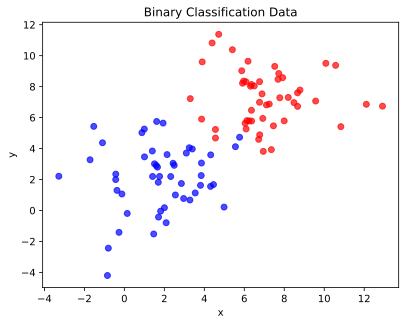

In [62]:
plt.scatter(x[:, 0].numpy(), x[:, 1].numpy(), c=y.numpy(), cmap='bwr', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary Classification Data')
plt.show()

In [90]:
# build the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),   # input layer
    nn.ReLU(),        # activation unit
    nn.Linear(1,1),   # output unit
    nn.Sigmoid(),     # final activation unit, better to use BCEWithLogitsLoss
      )
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [149]:
learningRate = .1
# loss function
lossfun = nn.BCELoss()
# optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [151]:
# train the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochs in range(numepochs):

  # forward pass
  yHat = ANNclassify(coordinates)

  # compute loss
  loss = lossfun(yHat,labels)
  losses[epochs] = loss

  # backprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

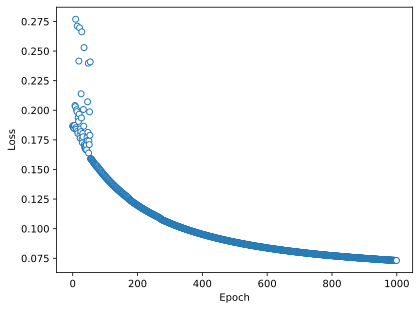

In [153]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [155]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = ANNclassify(coordinates)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*n)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 98%


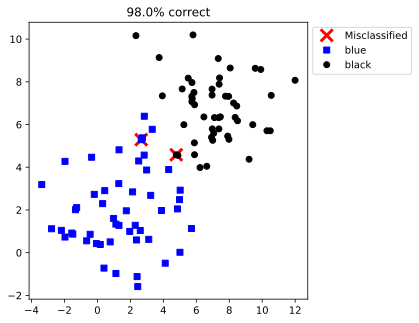

In [157]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(coordinates[misclassified,0] ,coordinates[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(coordinates[np.where(~predlabels)[0],0],coordinates[np.where(~predlabels)[0],1],'bs')
plt.plot(coordinates[np.where(predlabels)[0],0] ,coordinates[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()